# COGS 108 - Final Project - Analysis on Earthquake with Tsunami and damage

## Overview

Earthquakes and tsunami are both destructive natural disasters that cause horrible damages to people's lives. Since Tsunami in a lot of cases come with earthquakes, the study attempts to analyze whether the degree of damage in terms of property loss caused by Earthquake with tsunami is greater than the earthquake without tsunami.  We also wonder if the magnitude of the Earthquake is higher when a tsunami occurs. In this study , students used Ordinary least squares regression, univariate regression and cross validation to test our model. The result was that there was a correlation between damage and tsunami, however, their causal relationship was very weak.


## Names

Yian Gong

Shuyang Zhang

Yumei Feng

Zixin Ma

Yikai Mao

## Research Question

Is there a difference between the degree of damages caused by earthquakes with tsunami and earthquakes without tsunami? 

## Background and Prior Work

Earthquakes are one of the most destructive natural disasters that can cause millions of damages and life losses. It’s caused by drastic crustal movement where rocks underground suddenly break along a fault generating seismic waves that make the ground shake. The earthquake with great magnitude can cause the occurrence of tsunamis which can result even greater damage. Historical incidents have shown earthquakes with tsunami lead much more damage to the landscape and human habitat than usual earthquakes, but this study aim to investigate to which extent do earthquakes with tsunami cause more damage.

In several scientific articles studied before the research, no articles correlated to our research question perfectly. But we indeed found some articles that examined the similar issue in some other perspectives which could offer intriguing views to this research. 
The article “Effects of earthquake spatial slip correlation on variability of tsunami potential energy and intensities”, written by several authors including Crempien, Urrutia and Benavente, provided a scientific modeling of characterizing tsunami’s intensity stems from earthquakes. Because the authors implied that tsunami and earthquakes largely correlated with each other, the article provided a very useful insight on the relationship between earthquakes and tsunamis for the hypothesis in this research.

The article first proposed the result in the abstract part that “tsunami intensity measures and potential energy variability increase with increasing spatial slip correlations” (Crempien et al., 1). This meant that the intensity and energy measured tsunami increase with spatial slip correlations, one of the measures of earthquakes. The result could trigger us to consider the hypothesis that in lots of cases, occurrence of earthquakes could coincide with tsunami. The article also stated that “inundation depths corre- sponding to 90 and 99% probability of total damage” (Crempien et al., 1). The inundation depths were measures of tsunami, which implied that tsunamis could account for large percent of damages, and this somehow led to our hypothesis that once there was a occurrence of tsunami with earthquakes, the damages in total ought to be greater than those earthquakes without tsunamis.

Besides looking into scholarly articles, we also examined prior data analysis done on earthquakes. A project we found on Github by Nishant Satpathy simply analyzed the data about several aspects of historical earthquakes while his report failed to investigate the relationship between earthquakes and tsunamis. In order to carry the analysis further, we decided to conduct a deep data analysis on figuring out the difference in the degrees of damage for earthquakes with tsunami and earthquakes without tsunami (nishant satpathy) in our project.


References (include links):
1: https://www.nature.com/articles/s41598-020-65412-3#Sec2
2:https://github.com/nishantsatpathy/Earthquake-Data-Analysis/blob/master/Earthquake_Data_Analysis.ipynb

## Hypothesis

Earthquake with or without tsunami would have an influence on the damage of the earthquake. Earthquakes with tsunami would have greater intensity and cause more damage.

## Dataset(s)


Dataset Name: Significant Earthquake Database 

Link to the dataset: https://public.opendatasoft.com/explore/dataset/significant-earthquake-database/table/?sort=-eq_primary&location=2,41.11247,18.10547&basemap=jawg.streets

Number of observations:  6208 

The data adopted here was the Significant Earthquake Database. It contained information of desructive earthquakes from 2150 B.C to the present. It had 43 columns in total. Some important variables included were *Flag Tsunami, Year, Month, Day, Mw Magnitude, Country, Location Name, Total Effects : Damages in million Dollars, Total Effects : Damage Description, Coordinates*. Other irrelevant variables were excluded in the research dataframe.

## Setup

In [1]:
#To install geopandas uncomment below line
#!pip install --user geopandas

In [2]:
#General imports 
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


import random
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [3]:
# take a look at the information stored in df
df = pd.read_csv('significant-earthquake-database.csv', sep = ';')
#df

## Data Cleaning
The students filtered dataset by picking out the columns with useful information. Irrelevant columns such as "ID Earthquake","Earthquake : Missing", "Earthquake : Missing Description" were filtered out from our dataset. The next step was to drop the missing values in "Mw magnitude", "Total Effects : Damages in million Dollars", "Total Effects : Damage Description columns. Then the categorial data was transformed into numerical values for the convenience of later analysis. Then,rename the column. Finally,2 dataframe was created, one was Earthquake with Tsunami, and the other one was Earthquake without Tsunami.

**Justification for dropping certain columns:**

There was several kinds of magnitude scales listed on the dataframe but the students chose to use "Mw magnitude" for analysis since it worked over a wider range of earthquake sizes and was applicable globally.
Evidence found here: http://www.geo.mtu.edu/UPSeis/intensity.html

There were many types of damages including injuries, deaths,houses, and property damage in the dataset, the study only focused on analyzing total effects og the damage in millions of dollars since it was representative of damages and significant enough for consideration. Since a large amount of null spaces existed in the dataset, narrowing down columns would allow students to drop less data and to left with more data for analysis.  

In [4]:
#Count the number of nulls in columns 
damage_missing = df['Total Effects : Damages in million Dollars'].isna().sum()
damage_description_missing = df['Total Effects : Damage Description'].isna().sum()
null = {'Column name':["Total Effects : Damages in million Dollars","Total Effects : Damage Description"],'Number of Null values' : [damage_missing,damage_description_missing]}
#Store varaibles in a dataframe for comparison
df_null = pd.DataFrame(null)
df_null

,Column name,Number of Null values
0,Total Effects : Damages in million Dollars,5752
1,Total Effects : Damage Description,2915


In [5]:
#Filter the dataset with only columns we need for analysis 
df = df[['Flag Tsunami','Year','Month','Day','Mw Magnitude','Country','Location name','Total Effects : Damages in million Dollars','Total Effects : Damage Description','Coordinates']]
#Display the first few rows of the filtered dataset
df.head(3)

,Flag Tsunami,Year,Month,Day,Mw Magnitude,Country,Location name,Total Effects : Damages in million Dollars,Total Effects : Damage Description,Coordinates
0,Tsunami,-50,NaN,NaN,NaN,GEORGIA,GEORGIA: DYOSCURIA [SUKHUMI],NaN,MODERATE (~$1 to $5 million),"43.0,41.0"
1,NaN,105,NaN,NaN,NaN,TURKEY,TURKEY,NaN,NaN,"39.5,27.0"
2,NaN,324,8.0,6.0,NaN,ITALY,ITALY: CAMPANIA,NaN,NaN,"40.5,14.5"


Apply columns "Mw magnitude","Total Effects : Damages in million Dollars","Total Effects : Damage Description" for later analysis

Therefore, drop all null values in these columns.

In [6]:
# Drop rows with null data in specific columns 
df = df.dropna(subset=['Mw Magnitude','Total Effects : Damages in million Dollars','Total Effects : Damage Description'])
#df

In [7]:
# Calculate how many unique categories in damage description
types_damage_description =df['Total Effects : Damage Description'].unique()
types_damage_description

array(['EXTREME (~$25 million or more)',
       'LIMITED (roughly corresponding to less than $1 million)',
       'SEVERE (~>$5 to $24 million)', 'MODERATE (~$1 to $5 million)'],
      dtype=object)

In [8]:
#Convert all categories into numerical values
def convert_damage(string):
    if('LIMITED (roughly corresponding to less than $1 million)' in string):
        output = 1
    elif('MODERATE (~$1 to $5 million)' in string):
        output = 2
    elif('SEVERE (~>$5 to $24 million)' in string):
        output = 3
    elif('EXTREME (~$25 million or more)' in string):
        output = 4
    return output

In [9]:
#Apply the function to our dataset 
df['Total Effects : Damage Description'] = df['Total Effects : Damage Description'].apply(convert_damage)
#df

In [10]:
# Calculate how many unique categories in Flag Tsunami
types_tsunami =df['Flag Tsunami'].unique()
types_tsunami

array(['Tsunami', nan], dtype=object)

In [11]:
#Convert all categories into boolean
def convert_tsunami(string):
    if string == 'Tsunami':
        output = True
    else:
        output = False
    return output

In [12]:
#Apply the function to our dataset
df['Flag Tsunami'] = df['Flag Tsunami'].apply(convert_tsunami)
df.head(3)

,Flag Tsunami,Year,Month,Day,Mw Magnitude,Country,Location name,Total Effects : Damages in million Dollars,Total Effects : Damage Description,Coordinates
110,True,1920,12.0,16.0,8.3,CHINA,"CHINA: GANSU PROVINCE, SHANXI PROVINCE",25.000,4,"36.601,105.317"
133,True,1953,4.0,23.0,7.4,PAPUA NEW GUINEA,PAPUA NEW GUINEA: SOLOMON ISLANDS,0.013,1,"-4.449,152.868"
151,True,1968,5.0,16.0,8.2,JAPAN,JAPAN: OFF EAST COAST OF HONSHU ISLAND,131.000,4,"40.8,143.2"


In [13]:
#Rename the column name
df = df.rename({'Flag Tsunami':'Tsunami', 'Mw Magnitude': 'Magnitude', 'Total Effects : Damages in million Dollars': 'Damage in M$', 'Total Effects : Damage Description':'Damage level' },axis = 'columns')

In [14]:
df_with_tsunami = df[df['Tsunami'] == True]
#df_with_tsunami

In [15]:
df_with_no_tsunami = df[df['Tsunami'] == False]
#df_with_no_tsunami

## Data Analysis & Results

### Exploratory Data Analysis

#### Part(1)

This part, explore the dataset and see how these earthquakes distribute on world map.

In [16]:
Longitude = []
Latitude = []
for i in df.Coordinates:
    Longitude.append(i.split(',')[1])
    Latitude.append(i.split(',')[0])

In [17]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(Longitude, Latitude))
gdf.head()

,Tsunami,Year,Month,Day,Magnitude,Country,Location name,Damage in M$,Damage level,Coordinates,geometry
110,True,1920,12.0,16.0,8.3,CHINA,"CHINA: GANSU PROVINCE, SHANXI PROVINCE",25.000,4,"36.601,105.317",POINT (105.31700 36.60100)
133,True,1953,4.0,23.0,7.4,PAPUA NEW GUINEA,PAPUA NEW GUINEA: SOLOMON ISLANDS,0.013,1,"-4.449,152.868",POINT (152.86800 -4.44900)
151,True,1968,5.0,16.0,8.2,JAPAN,JAPAN: OFF EAST COAST OF HONSHU ISLAND,131.000,4,"40.8,143.2",POINT (143.20000 40.80000)
182,False,1999,9.0,30.0,7.5,MEXICO,MEXICO: OAXACA,164.800,4,"16.059,-96.931",POINT (-96.93100 16.05900)
216,False,2016,11.0,25.0,6.6,CHINA,CHINA: XINJIANG PROVINCE: KASHGAR,5.500,3,"39.273,73.978",POINT (73.97800 39.27300)


Text(0.5, 1.0, 'World Distribution of Earthquakes (With and Without Tsunami)')

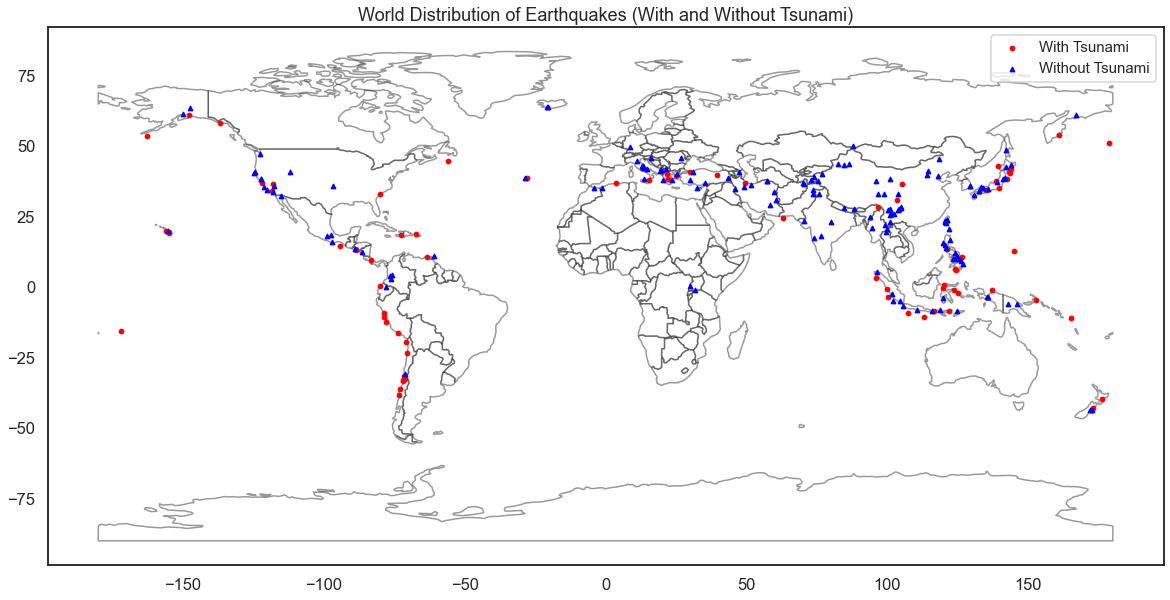

In [18]:
sns.set_style(style = 'white')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig,ax = plt.subplots(figsize=(20,20))
world.plot(ax=ax, alpha=0.4, color='white', edgecolor='black')
gdf[gdf['Tsunami'] == True].plot(ax=ax, markersize=18, color='red', marker='o', label='With Tsunami')
gdf[gdf['Tsunami'] == False].plot(ax=ax, markersize=18, color='blue', marker='^', label='Without Tsunami')
plt.legend(prop={'size':15})
plt.title('World Distribution of Earthquakes (With and Without Tsunami)', fontsize=18)

The distribution basically corresponded to theory of plate tectonics that earthquakes clustered at edges of plates. There were red dots (earthquakes with tsunami) in middle of China, possibly because of large rivers next to those locations.

#### Part(2)

This part graphed a histogram to see the overall distribution of damages in million dollar caused by earthquakes.

In [19]:
avg_damage_tsunami = df_with_tsunami.describe()['Damage in M$']['mean']
med_damage_tsunami = df_with_tsunami.describe()['Damage in M$']['50%']
std_damage_tsunami = df_with_tsunami.describe()['Damage in M$']['std']
avg_damage_no_tsunami = df_with_no_tsunami.describe()['Damage in M$']['mean']
med_damage_no_tsunami = df_with_no_tsunami.describe()['Damage in M$']['50%']
std_damage_no_tsunami = df_with_no_tsunami.describe()['Damage in M$']['std']

print('')
printmd('**For earthquake with tsunami:**')
print('Average damage in million dollar: {} million $'.format(round(avg_damage_tsunami, 3)))
print('Median damage in million dollar: {} million $'.format(round(med_damage_tsunami, 3)))
print('Standard deviation: {}'.format(round(std_damage_tsunami, 3)))

printmd('**For earthquake without tsunami:**')
print('Average damage in million dollar: {} million $'.format(round(avg_damage_no_tsunami, 3)))
print('Median damage in million dollar: {} million $'.format(round(med_damage_no_tsunami, 3)))
print('Standard deviation: {}'.format(round(std_damage_no_tsunami, 3)))

**For earthquake with tsunami:**

Average damage in million dollar: 7710.409 million $
Median damage in million dollar: 132.5 million $
Standard deviation: 29422.477


**For earthquake without tsunami:**

Average damage in million dollar: 1253.025 million $
Median damage in million dollar: 70.0 million $
Standard deviation: 3539.607


Because the mean was way larger than the median of both dataset, the histogram should be positive skewed, which largely increased the standard deviation. Then, check it by drawing it out.

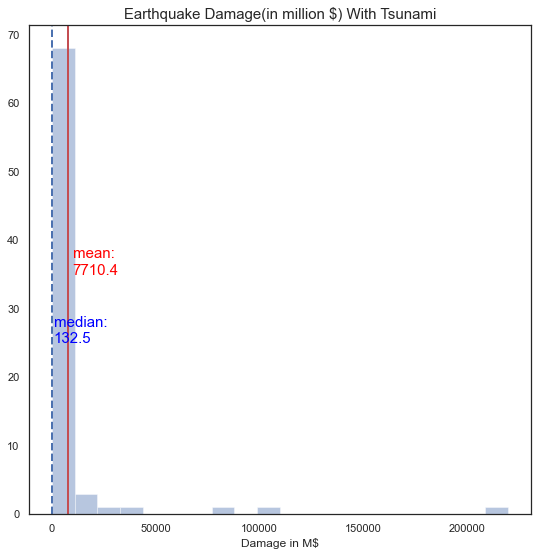

In [55]:
sns.set_style(style = 'white')
sns.distplot(df_with_tsunami['Damage in M$'], kde=False, bins=20);
plt.title('Earthquake Damage(in million $) With Tsunami', fontsize=15)
plt.axvline(avg_damage_tsunami, color='r', linestyle='-', linewidth=2)
plt.axvline(med_damage_tsunami, color='b', linestyle='--', linewidth=2)
plt.text(10000, 35, 'mean:\n' + "7710.4", color='red', fontsize=15)
plt.text(1000, 25, 'median:\n' + "132.5", color='blue', fontsize=15)
sns.set(rc={'figure.figsize':(9,9)})

The outliers were so large,which affected the mean. Those were disastrous earthquakes. Since they are skewed, transform the data to be log10 of them:

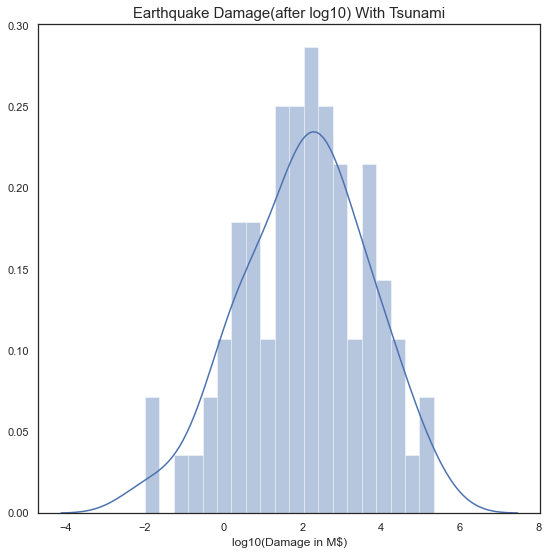

In [21]:
sns.set_style(style = 'white')
sns.distplot(np.log10(df_with_tsunami['Damage in M$']), bins = 20);
plt.title('Earthquake Damage(after log10) With Tsunami', fontsize=15)
plt.xlabel("log10(Damage in M$)")
sns.set(rc={'figure.figsize':(9,9)})

Apply the similar principle to df_with_no_tsunami:

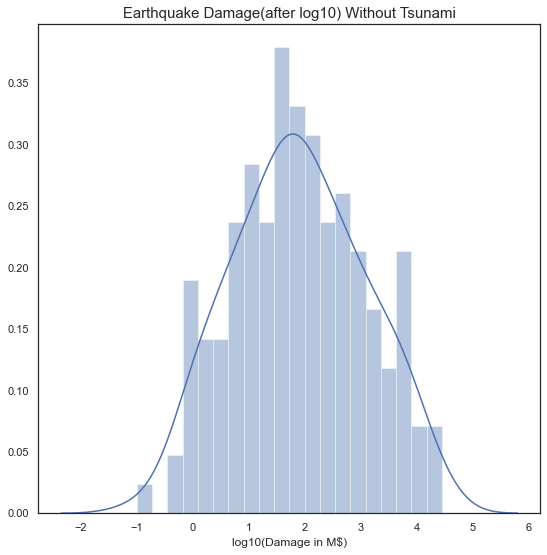

In [22]:
sns.set_style(style = 'white')
sns.distplot(np.log10(df_with_no_tsunami['Damage in M$']), bins=20);
plt.title('Earthquake Damage(after log10) Without Tsunami', fontsize=15)
plt.xlabel("log10(Damage in M$)")
sns.set(rc={'figure.figsize':(9,9)})

Compare new mean, new median, and new standard deviation of the transformed data:

In [23]:
avg_log10_damage_tsunami = np.mean(np.log10(df_with_tsunami['Damage in M$']))
med_log10_damage_tsunami = np.median(np.log10(df_with_tsunami['Damage in M$']))
std_log10_damage_tsunami = np.std(np.log10(df_with_tsunami['Damage in M$']))
avg_log10_damage_no_tsunami = np.mean(np.log10(df_with_no_tsunami['Damage in M$']))
med_log10_damage_no_tsunami = np.median(np.log10(df_with_no_tsunami['Damage in M$']))
std_log10_damage_no_tsunami = np.std(np.log10(df_with_no_tsunami['Damage in M$']))

print('')
printmd('**For earthquakes with tsunami:**')
print('Average damage(after log10): {}'.format(round(avg_log10_damage_tsunami, 3)))
print('Median damage(after log10): {}'.format(round(med_log10_damage_tsunami, 3)))
print('Standard deviation damage(after log10): {}'.format(round(std_log10_damage_tsunami, 3)))
printmd('**For earthquakes without tsunami:**')
print('Average damage(after log10): {}'.format(round(avg_log10_damage_no_tsunami, 3)))
print('Median damage(after log10): {}'.format(round(med_log10_damage_no_tsunami, 3)))
print('Standard deviation damage(after log10): {}'.format(round(std_log10_damage_no_tsunami, 3)))

**For earthquakes with tsunami:**

Average damage(after log10): 2.06
Median damage(after log10): 2.122
Standard deviation damage(after log10): 1.578


**For earthquakes without tsunami:**

Average damage(after log10): 1.896
Median damage(after log10): 1.845
Standard deviation damage(after log10): 1.165


From above, the students cou;d (possibly) see that earthquake with tsunami caused more severe and more varied damage than earthquake without tsunami.

#### Part(3)

In this part, check how distribution of earthquakes' magnitude looks like.

In [24]:
avg_magnitude = df.describe()['Magnitude']['mean']
avg_magnitude_tsunami = df_with_tsunami.describe()['Magnitude']['mean']
med_magnitude_tsunami = df_with_tsunami.describe()['Magnitude']['50%']
avg_magnitude_no_tsunami = df_with_no_tsunami.describe()['Magnitude']['mean']
med_magnitude_no_tsunami = df_with_no_tsunami.describe()['Magnitude']['50%']

print('')
print('Average magnitude: {} '.format(round(avg_magnitude, 3)))
printmd('**For earthquake with tsunami:**')
print('Average magnitude: {} '.format(round(avg_magnitude_tsunami, 3)))
print('Median magnitude: {} '.format(round(med_magnitude_tsunami, 3)))
printmd('**For earthquake without tsunami:**')
print('Average magnitude: {} '.format(round(avg_magnitude_no_tsunami, 3)))
print('Median magnitude: {} '.format(round(med_magnitude_no_tsunami, 3)))


Average magnitude: 6.828 


**For earthquake with tsunami:**

Average magnitude: 7.724 
Median magnitude: 7.8 


**For earthquake without tsunami:**

Average magnitude: 6.388 
Median magnitude: 6.4 


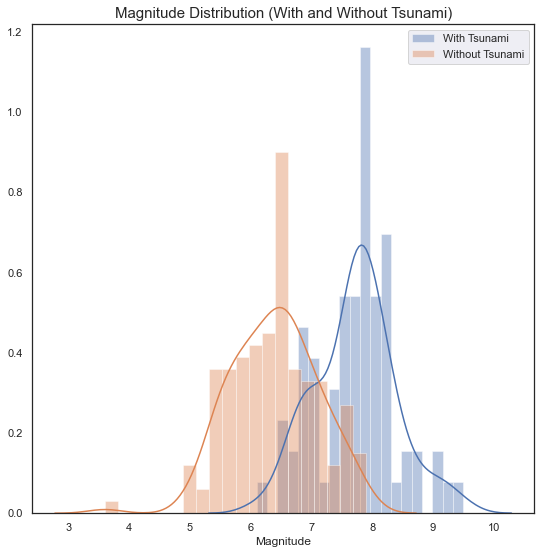

In [25]:
sns.set_style(style = 'white')
sns.distplot(df_with_tsunami['Magnitude'], bins=20);
plt.title('Magnitude Distribution', fontsize=15)
sns.distplot(df_with_no_tsunami['Magnitude'], bins=20);
plt.title('Magnitude Distribution (With and Without Tsunami)', fontsize=15)
sns.set(rc={'figure.figsize':(9,9)})
plt.legend(labels=['With Tsunami', 'Without Tsunami'])

Looks like a normal distribution. Let's test normality:

In [26]:
magnitude_tsunami = df_with_tsunami['Magnitude'].values
st_magnitude_t, p_magnitude_t = stats.normaltest(magnitude_tsunami)

magnitude_no_tsunami = df_with_no_tsunami['Magnitude'].values
st_magnitude_n, p_magnitude_n = stats.normaltest(magnitude_no_tsunami)

print('')
printmd('**For Magnitude with tsunami**')
print('test statistic:')
print(st_magnitude_t)
print('p_value:')
print(p_magnitude_t)
printmd('**For Magnitude without tsunami**')
print('test statistic:')
print(st_magnitude_n)
print('p_value:')
print(p_magnitude_n)

**For Magnitude with tsunami**

test statistic:
0.5958381521214482
p_value:
0.7423614121269306


**For Magnitude without tsunami**

test statistic:
3.207775247852661
p_value:
0.20111314397907412


Since p-values for two datasets are large, they are both normally distributed.

#### Part(4)

This part explored the relationship between magnitude and damage of earthquake. Note: here the magnitude was measured by Mw magnitude(Moment Magnitude Scale) not Richter scale(Ml magnitude) that people normally heard about, but the study still could use the magnitude to indicate the level of earthquake.

Text(0.5, 1.0, 'Damages of Earthquake With Tsunami By Magnitude')

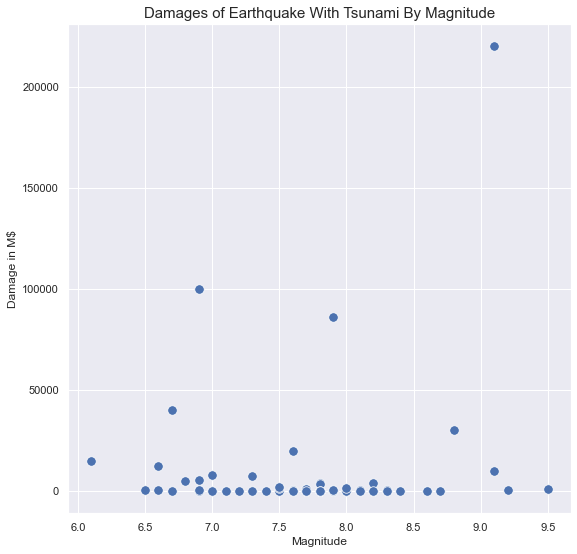

In [27]:
fig_dims = (9, 9)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x ='Magnitude', y ='Damage in M$', data = df_with_tsunami, s = 90, ax = ax)
plt.title('Damages of Earthquake With Tsunami By Magnitude', fontsize=15)

Text(0.5, 1.0, 'Damages of Earthquake Without Tsunami By Magnitude')

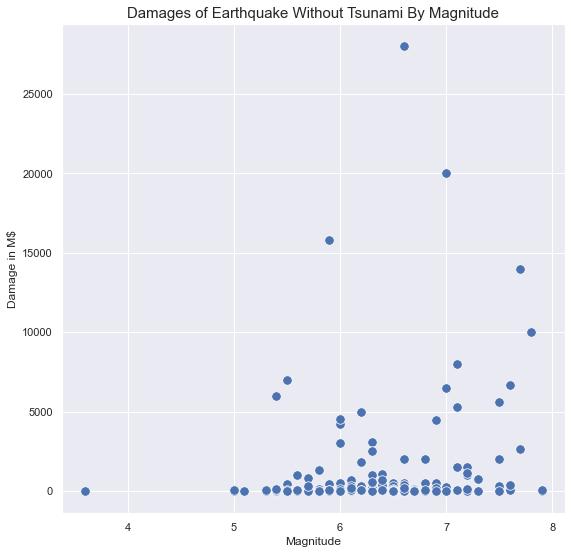

In [28]:
fig_dims = (9, 9)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x ='Magnitude', y ='Damage in M$', data = df_with_no_tsunami, s = 90, ax = ax)
plt.title('Damages of Earthquake Without Tsunami By Magnitude', fontsize=15)

Looks like the relationship is weak. Further exploration of the casation relationship was in Data Analysis section.

## Data Analysis

To analyse whether there was a relationship between the presence of tsunami and damage, the first step was to get the damage column in both conditions

In [29]:
damage_t = df_with_tsunami['Damage in M$']

print('')
printmd('**The damages column for earthquakes with Tsunami**')
print(damage_t)

**The damages column for earthquakes with Tsunami**

110        25.000
133         0.013
151       131.000
414         4.200
436     12500.000
          ...    
5725      600.000
5814      100.000
5907       90.000
6137     7200.000
6177    15000.000
Name: Damage in M$, Length: 76, dtype: float64


In [30]:
damage_f = df_with_no_tsunami['Damage in M$']

print('')
printmd('**The damages column for earthquakes without Tsunami**')
print(damage_f)

**The damages column for earthquakes without Tsunami**

182      164.8
216        5.5
217        2.0
220      150.0
417     1000.0
         ...  
6198     123.0
6199       5.0
6203    1300.0
6204    5300.0
6205      45.0
Name: Damage in M$, Length: 155, dtype: float64


Showing again the average damages, because the original data was not normally distributed, we wouold use the average after log

In [31]:
print('Average damage with Tsunami(after log10): {}'.format(round(avg_log10_damage_tsunami, 3)))
print('Average damage without Tsunami(after log10): {}'.format(round(avg_log10_damage_no_tsunami, 3)))

Average damage with Tsunami(after log10): 2.06
Average damage without Tsunami(after log10): 1.896


Based on the data above, it looked like there indeed might be a differnece in average damages between earthquakes with and without tsunami
But the students had to further test the relationship by doing a T-test to test the data statistically

In [32]:
t_val,p_val = ttest_ind(damage_t, damage_f)
print(t_val,p_val)

2.6988087591002117 0.007477447825027928


Check if statistical test passes significance, using an alpha value of 0.01.

In [33]:
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')
    

There is a significant difference!


The reault showed that there was a significant diffence between the damages caused by earthquakes with and without tsunami, to further study this we needed to consider whether there was a possible counfounding variable and how much of the difference in damages could be explained by the one factor of with and without tsunami alone.

Text(0.5, 1.0, 'The relationship between Magnitude and Damage regardless of Tsunami')

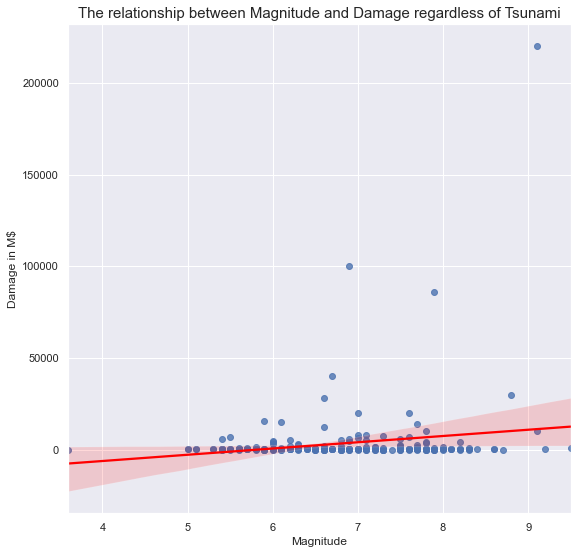

In [34]:

sns.regplot(x= df['Magnitude'],
            y=df['Damage in M$'], 
            data=df, line_kws={"color": "red"});

plt.title('The relationship between Magnitude and Damage regardless of Tsunami', fontsize=15)

From the graph above, it seemed like there was no apprant relationship between damages and magnitude, but the students wanted to test this statistically

In [35]:
corr1 = df['Magnitude'].corr(df['Damage in M$'])
print('the correlation between Magnitude and Damage')
print(corr1)

the correlation between Magnitude and Damage
0.1846086997836751


In [36]:
magnitude_t = df_with_tsunami['Magnitude']

print('')
printmd('**The magnitude column for earthquakes with earthquake**')
print(magnitude_t)

**The magnitude column for earthquakes with earthquake**

110     8.3
133     7.4
151     8.2
414     8.2
436     6.6
       ... 
5725    8.3
5814    8.2
5907    8.3
6137    7.3
6177    6.1
Name: Magnitude, Length: 76, dtype: float64


In [37]:
magnitude_f = df_with_no_tsunami['Magnitude']

print('')
printmd('**The magnitude column for earthquakes without earthquake**')
print(magnitude_f)

**The magnitude column for earthquakes without earthquake**

182     7.5
216     6.6
217     5.9
220     7.0
417     7.2
       ... 
6198    5.4
6199    6.5
6203    5.8
6204    7.1
6205    5.6
Name: Magnitude, Length: 155, dtype: float64


In [38]:
print('Average magnitude with tsunami: {} '.format(round(avg_magnitude_tsunami, 3)))
print('Average magnitude without tsunami: {} '.format(round(avg_magnitude_no_tsunami, 3)))

Average magnitude with tsunami: 7.724 
Average magnitude without tsunami: 6.388 


The data suggests that there might be a meaningful difference between the magnitude with and without tsunami, but further test using a T-test was demanded.

In [39]:
t_val2,p_val2 = ttest_ind(magnitude_t, magnitude_f)
print(t_val2,p_val2)

13.693973807650105 1.3958610487700967e-31


In [40]:
if p_val2 < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')
    

There is a significant difference!


The reault showed that there is a significant difference between the magnitude caused by earthquakes with and without tsunamis, but we need to further explore if the difference in damage can be explained by magnitude and having tsunami or not.

## Linear Models

In [41]:
df2 = df.rename({'Flag Tsunami':'Tsunami', 'Mw Magnitude': 'Magnitude', 'Damage in M$': 'Damage', 'Total Effects : Damage Description':'Damage level' },axis = 'columns')
print(df2)


      Tsunami  Year  Month   Day  Magnitude           Country  \
110      True  1920   12.0  16.0        8.3             CHINA   
133      True  1953    4.0  23.0        7.4  PAPUA NEW GUINEA   
151      True  1968    5.0  16.0        8.2             JAPAN   
182     False  1999    9.0  30.0        7.5            MEXICO   
216     False  2016   11.0  25.0        6.6             CHINA   
...       ...   ...    ...   ...        ...               ...   
6198    False  2017    5.0  10.0        5.4             CHINA   
6199    False  2017    7.0   6.0        6.5       PHILIPPINES   
6203    False  2019    6.0  17.0        5.8             CHINA   
6204    False  2019    7.0   6.0        7.1               USA   
6205    False  2019    9.0  21.0        5.6           ALBANIA   

                                 Location name    Damage  Damage level  \
110    CHINA:  GANSU PROVINCE, SHANXI PROVINCE    25.000             4   
133         PAPUA NEW GUINEA:  SOLOMON ISLANDS     0.013             1 

In [42]:
outcome_1, predictors_1 = patsy.dmatrices('Damage ~ Tsunami', df2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [43]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Damage   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     7.284
Date:                Thu, 17 Dec 2020   Prob (F-statistic):            0.00748
Time:                        11:56:37   Log-Likelihood:                -2578.1
No. Observations:                 231   AIC:                             5160.
Df Residuals:                     229   BIC:                             5167.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1253.0253   1372.415     

In [44]:
outcome_2, predictors_2 = patsy.dmatrices('Damage ~ Tsunami + Magnitude', df2)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

In [45]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Damage   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     4.619
Date:                Thu, 17 Dec 2020   Prob (F-statistic):             0.0108
Time:                        11:56:37   Log-Likelihood:                -2577.1
No. Observations:                 231   AIC:                             5160.
Df Residuals:                     228   BIC:                             5171.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.309e+04   1.04e+04     

The results of OLS Regression Results suggests that there was a weak direct relationship between Tsunami and Damges, and adding another variable of magnitude slightly increaseed the power of explaining the variance in damage. This suggested that magnitude might be a counfounding variable. But overall, the damage difference could not be fully explained by simply two variables of tsunami and magnitude.

## One Degree Univariate Regression Models and Cross Validation

From the 2 scatter plots in part 2 of Exploratory Data Analysis, some linear relationship between damage in million dollars and magnitude in both datasets(with Tsunami and without Tsunnami) is observed. Many samples line lay on or a little bit above y = 0 in both pictures. Thus, one degree regression model was adopted here. 

### Train the dataset, split the dataset into 80% training set and 20% testing set

In [46]:
#get four arrays, shuffle the dataset
df_train_withTsunami, df_test_withTsunami = train_test_split(df_with_tsunami.values, test_size = 0.2, train_size = 0.8, shuffle = True)
df_train_withoutTsunami, df_test_withoutTsunami = train_test_split(df_with_no_tsunami.values, test_size = 0.2, train_size = 0.8, shuffle = True)


### Model 1: Damage = w0 + w1* Magnitude_with_Tsunami 

In [47]:
## Train model on the dataset of earthquakes with tsunami
## Create A, the augmented data array
X = np.array(df_train_withTsunami[:,4])
X = X.astype(np.float64)
Y = np.array(df_train_withTsunami[:,7])
Y = Y.astype(np.float64)
ones = np.ones([len(X), ], dtype = int)
A = np.vstack((ones, X))
A1 = A.transpose()
A1.shape


(60, 2)

In [48]:
## Solve for w, the weight vector
ws = np.linalg.lstsq(A1, Y, rcond=None)[0]
ws

array([-42082.87449692,   6717.98500501])

In [49]:
M1_predict = ws[0] + ws[1] * X
print('Model 1: Damage = %f + %f * Magnitude ' % (ws[0], ws[1]))

Model 1: Damage = -42082.874497 + 6717.985005 * Magnitude 


### Model 2: Damage = w0 + w1* Magnitude_Without_Tsunami

In [50]:
## Create A, the augmented data array
X2 = df_train_withoutTsunami[:,4] 
X2 = X2.astype(np.float64)
Y2 = df_train_withoutTsunami[:,7]
Y2 = Y2.astype(np.float64)

ones2 = np.ones([len(X2), ], dtype = int)
A2 = np.vstack((ones2, X2))
A22 = A2.transpose()
A22.shape 
## Solve for w, the weight vector
ws2 = np.linalg.lstsq(A22, Y2, rcond=None)[0]
M2_predict = ws2[0] + ws2[1] * X2
print('Model2: Damage = %f + %f * Without_Tsunami ' % (ws2[0], ws2[1]))

Model2: Damage = -3761.311903 + 751.280052 * Without_Tsunami 


### Calculate Mean Squared Error (MSE) on both Training and Testing datasets

In [51]:
#MSE value on Training datasets
sample_size1 = len(df_train_withTsunami)
sample_size2 = len(df_train_withoutTsunami)
MSE_model1 = ((Y - M1_predict)**2).sum()/sample_size1
MSE_model2 = ((Y2 - M2_predict)**2).sum()/sample_size2


In [52]:
#Input the testing data into the models


XT1 = np.array(df_test_withTsunami[:,4]) # Magnitude of Earthquake with Tsunami in Testing dataset
XT1 = X.astype(np.float64)
YT1 = np.array(df_test_withTsunami[:,7]) #Damage in million dollars with Tsunami in Testing dataset
YT1 = Y.astype(np.float64)

XT2 = df_test_withoutTsunami[:,4] # Magnitude of Earthquake without Tsunami in Testing dataset
XT2 = X2.astype(np.float64)
YT2 = df_test_withoutTsunami[:,7] #Damage in million dollars without Tsunami in Testing dataset
YT2 = Y2.astype(np.float64)


# the calculated y value(damage in million dollors) based on the model and testing dataset input
M1_test_predict = ws[0] + ws[1] * XT1
M2_test_predict = ws2[0] + ws2[1] * XT2


In [53]:
test_samplesize1 = len(df_test_withTsunami) #16
test_samplesize2 = len(df_test_withoutTsunami) #31
MSE_model1_test = ((YT1 - M1_test_predict)**2).sum()/test_samplesize1
MSE_model2_test = ((YT2 - M2_test_predict)**2).sum()/test_samplesize2

MSE of training set of data with Tsunami (Model_1) is 8046579.994790 ,
MSE of training set of data without Tsunami(Model_2) is 32186319.979160 , 
MSE_model1_test is 3907389726.739876 , MSE_model2_test is 32186319.979160395 


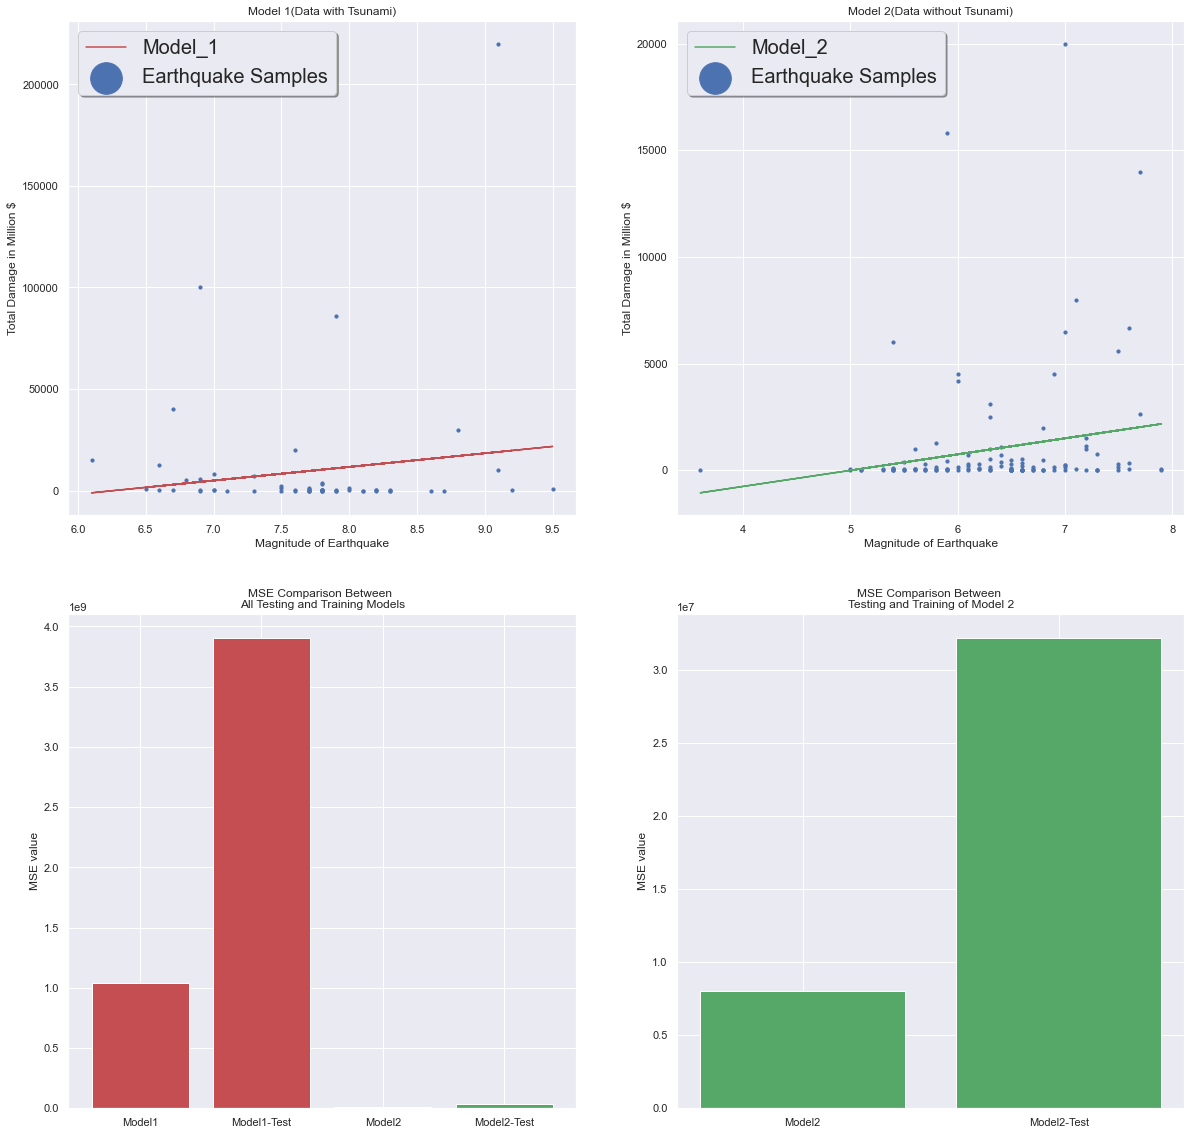

In [54]:
fig, axes1 = plt.subplots(2, 2, figsize=(20, 20))
# Model 1
axes1[0][0].scatter(X, Y, s = 10, label = 'Earthquake Samples')
axes1[0][0].plot(X, M1_predict, color = 'r', label = 'Model_1')
axes1[0][0].set(xlabel = 'Magnitude of Earthquake', ylabel = 'Total Damage in Million $', title = 'Model 1(Data with Tsunami)')
axes1[0][0].legend(shadow = True, markerscale = 10, fontsize = 20)

# Model 2 Upperright Graph
axes1[0][1].scatter(X2, Y2, s = 10, label = 'Earthquake Samples')
axes1[0][1].plot(X2, M2_predict, color = 'g', label = 'Model_2')
axes1[0][1].set(xlabel = 'Magnitude of Earthquake', ylabel = 'Total Damage in Million $', title = 'Model 2(Data without Tsunami)')
axes1[0][1].legend(shadow = True, markerscale = 10, fontsize = 20)

#lowerleft Graph
MSE_xaxis_label = ['Model1','Model1-Test','Model2','Model2-Test']
MSE_yaxis_data = [MSE_model1,MSE_model1_test,MSE_model2,MSE_model2_test]
axes1[1][0].bar(MSE_xaxis_label, MSE_yaxis_data,color = ['r','r','g','g'])
axes1[1][0].set_title('MSE Comparison Between \nAll Testing and Training Models')
axes1[1][0].set(ylabel = 'MSE value')

#lowerright Graph
MSE_xaxis_label = ['Model2','Model2-Test']
MSE_yaxis_data = [MSE_model2,MSE_model2_test]
axes1[1][1].bar(MSE_xaxis_label, MSE_yaxis_data,color = ['g','g'])
axes1[1][1].set_title('MSE Comparison Between \nTesting and Training of Model 2')
axes1[1][1].set(ylabel = 'MSE value')

print('MSE of training set of data with Tsunami (Model_1) is %f ,\nMSE of training set of data without Tsunami(Model_2) is %f , ' % (MSE_yaxis_data[0],MSE_yaxis_data[1]))
print('MSE_model1_test is %a , MSE_model2_test is %a ' % (MSE_model1_test,MSE_model2_test))

Based on the adopted one degree regression models and cross validation, the conclusion from the OLS Regression was assured. No strong direct relationship between magnitude and damage was discovered here. The MSE value could reflect the overall error of the model. Both Model 1 and Model 2 had high MSE values in general though the lower left graph showed a misleading low MSE for Model 2.Since the unit of MSE is 1e^9 in the lowerleft corner, Model 2 also had great MSE difference between training and testing sets. The testing sets had incredibly larger MSE than the training sets, which implied the low acccuary of the models. The slope of Model1 was smaller than the slope of Model2. Thus, our hypothesis could be possibly wrong, the earthquake with tsunami did not bring more damage than the earthquake without tsunami in this sampling. 

## Ethics & Privacy

We did have a well formed question. We wanted to analyze whether the degree of damage in terms of monetary loss caused by earthquake with tsunami was greater than the Earthquake without tsunami; to analyze whether the magnitude of the Earthquake was higher when a tsunami occured. We had the permission to use The dataset ‘significant-earthquake-database.csv’ directly because this dataset was from an open source website named OpenDataSoft. This website provided a number of different datasets for public researchers to use. This dataset contained 6204 number of earthquake samples with the feature of tsunami label, which indicated that this data was directly related to our question. The scope of the dataset was large because the year recorded in the dataset could be retrospected at least 2000 years and hundreds of samples were available for each year, especially for recent dates. The dataset might not be the perfect one for our question because we had to drop thousands of columns in the cleaning process due to missing values. The large amount of missing data might be a potential bias of our research, but we had to drop those columns due to research purposes. However, we believed that there was enough information provided to answer our question properly. This research could benefit groups studying natural disasters, because the research provided a view into how tsunami related to damage, and could also be beneficial for preparing future disasters. 

In terms of the privacy problems, because the adopted dataset did not include any personal identifiable information like IDs or names, but only information about natural disasters of earthquakes and related country data, there was little concern of privacy problems in the dataset and the overall risk level was very low. The models used were transparent with enough understanding of how the models worked and how the models reached their conclusions. We would be looking for potential side effects of the research and be alert to possible outcomes. 

The dataset did not involve personal traits or identities because it discussed natural events. No informed agreements to participate were needed here. 


## Conclusion & Discussion

The hypothesis was that earthquakes with tsunamis would have greater magnitude and cause more damages. However, after the analysis, students concluded that the hypothesis was wrong because both OLS regression and one degree linear regression showed that tsunami and damage had weak relationship and earthquake with tsunami did not necessarily have greater damage than the one without tsuami. 

Students first did t-testing and got the p-value, which indicated that damage and tsunami had correlation. Thus, further exploration of OLS regression and cross validation of linear models were applied for direct causal relationship checking. The OLS regression result showed that the two variables only had a weak relationship. The cross validation split the dataset into an 80% training set and a 20% testing set. The comparison of the MSE values of the models on training and testing datasets denied the existence of a strong relationship between the two variables, damage and tsunami. 

Moreover, several potential biases or limitations ought to be considered with the result. First, the dataset had a large year span (over 2000 years), so many numerical data were missing. Therefore, many samples were dropped during the data cleaning process, which could lead to deviation of the result. Also, the data used here was damage in millions of dollars, which could not be generalized into damage alone. Other damage such as casualty or pollution influence were not discussed here. 

For further improvement, the project could take geographical features into consideration since Tsunami usually occur on coastline and earthquakes usually are related to the continent plates.  Also, other damage such as housing damage and death number in the original dataset could be used for more analysis.  


## Team Contributions

Everyone in this group contributed to the final version of this project. 

Coding:

    Yumei Feng and Zixin Ma: Data cleaning
    Yikai Mao :EDA
    Yian Gong :Statistical Testing, OLS Regression 
    Shuyang Zhang: one degree univariate linear model and Cross Validation

For the rest of the reports like Overview and Conclusion, the students finished together by using Zoom and Google Doc.
For extra credit,  Yumei did video editing, and each of the members in the group contributed to the oral presentation. 
